#Why use Activation functions?
- The real world data is non-linear
- We need complex functions to represent those non-linearity
- Activation functions are responsible for doing that.
- If you remember from this video, the output of nerons is linear. ```x1*w1 + x2*w2...```
- Here is an example on my fav. tool.



> Again, Activation funtions is a non-linear function which takes a scaler value (z1) and maps it to a numerical value which is non-linear.



#Sigmoid activation function
- It squashes any input value between zero and one.
- [Sigmoid pyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)
- The formula is very simple ``` 1 / (1+ e^z) ``` where z in the input value
- Sigmoid function is also used as gate, which will see in future videos.
- Also Sigmoid function is sometimes called **Logistic** function.

In [ ]:
import torch
import torch.nn as nn

In [ ]:
sigmoid_fn = nn.Sigmoid()
input = torch.randn((3, 4))
input

In [ ]:
output = sigmoid_fn(input)
output

## Deeper dive into Sigmoid Function
The sigmoid function is given by:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

And its derivative is:

$$
\sigma'(x) = \sigma(x) * (1 - \sigma(x))
$$


##Lets plot Sigmoid and its Derivative functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

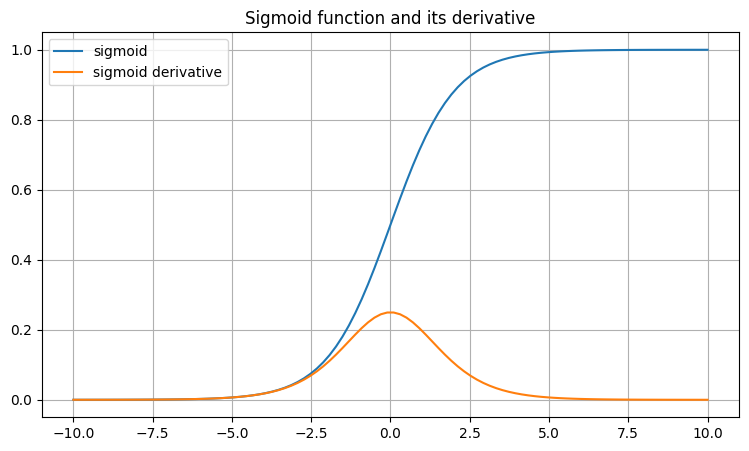

In [ ]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(9, 5))
plt.plot(x, sigmoid(x), label="sigmoid")
plt.plot(x, sigmoid_derivative(x), label="sigmoid derivative")
plt.title("Sigmoid function and its derivative")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


- Notice the range of Sigmoid function [0, 1]
- Notice the range of Sigmoid function's derivative maximum value is **0.23**
- Now this is big problem because in a deep neural network, because output of each layer will be multiplied with each other and this will lead to **Vanishing Gradient** problem.
  - This is why Sigmoid is mostly used as Gate than activation function
  - Sigmoid is used as activation function mostly in a classification problem's final output.

In [ ]:
# best case scenario, out of your 4 levle deep neural network layer all gave output of 0.25

0.23 * 0.23 * 0.23 * 0.23

0.0027984100000000003

#Hyperbolic TanH Activation Function

- It squashes any input value between -1 and 1.
- [TanH pyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html)
- The formula is very simple
$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$
where x in the input value
- Now you should notice that this is a zero centered function. Meaning at x=0, the tanh is also 0.
- Zero centered functions are much more useful while optimizing the AI models like LSTM, RNN etc.

## Deeper dive into Tanh function.
- Derivative of TanH function is
- $$ \frac{d}{dx} \tanh(x) = 1 - \tanh^2(x) $$


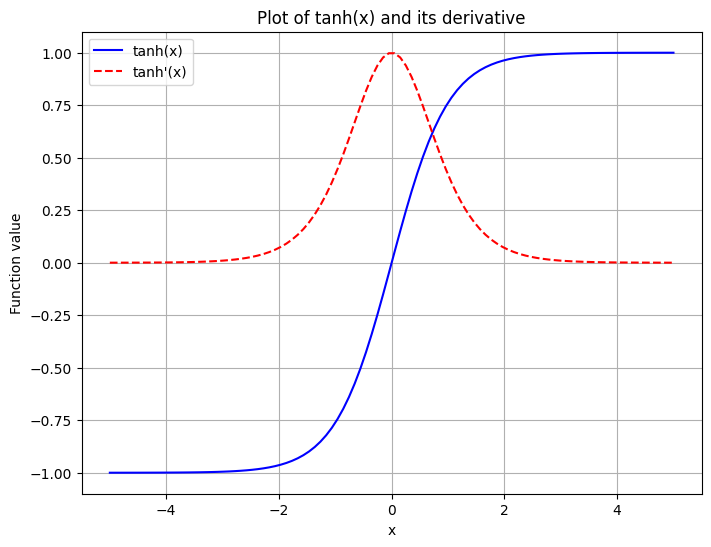

In [ ]:


# Define the range of x values
x_values = np.linspace(-5, 5, 100)

# Calculate tanh(x) and its derivative
tanh_values = np.tanh(x_values)
derivative_values = 1 - np.tanh(x_values)**2

# Plot both functions
plt.figure(figsize=(8, 6))
plt.plot(x_values, tanh_values, label='tanh(x)', color='blue')
plt.plot(x_values, derivative_values, label="tanh'(x)", color='red', linestyle='--')

# Add labels and title
plt.title("Plot of tanh(x) and its derivative")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




> Notice how the derivative of tanh has a maximum value as 1, which means it won't fall into the trap of **Vanishing Gradient** as much as Sigmoid does.



#ReLU activation function
- This is the most used activation function
- $$ ReLU(x) = \max(0, x) $$
- which means it return 0 is input value is negative else it returns the input value.
- ReLU's derivative
$$ \frac{d}{dx} ReLU(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{otherwise} \end{cases} $$


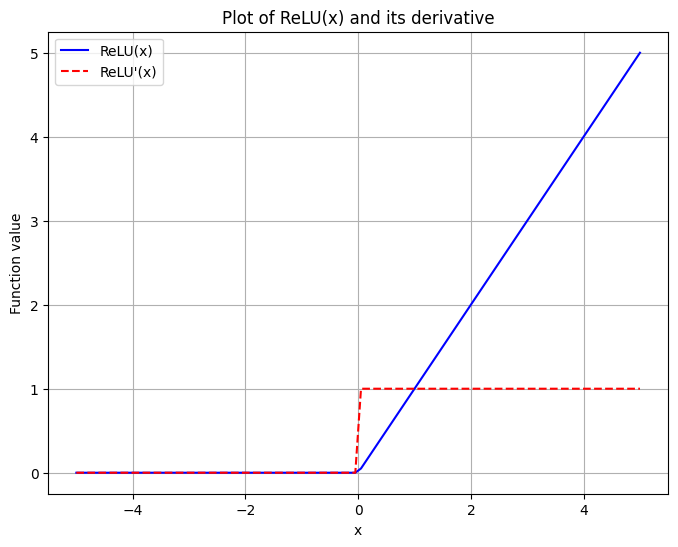

In [ ]:


# Define the ReLU function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the range of x values
x_values = np.linspace(-5, 5, 100)

# Calculate ReLU(x) and its derivative
relu_values = relu(x_values)
derivative_values = relu_derivative(x_values)

# Plot both functions
plt.figure(figsize=(8, 6))
plt.plot(x_values, relu_values, label='ReLU(x)', color='blue')
plt.plot(x_values, derivative_values, label="ReLU'(x)", color='red', linestyle='--')

# Add labels and title
plt.title("Plot of ReLU(x) and its derivative")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#PReLU Activation Function

- Now you see the problem, whenever the input is negative, the derivative will go to Zero and hence **Vanishing Gradient** problem.
- To overcome this draback, Parametric or PRelU was introduced.
- $$ PReLU(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha \cdot x & \text{otherwise} \end{cases} $$
- Notice when X is negative the value is not zero, its alpha times x where alpha is very small value
- And alpha is learnable, which when not required, it could be zero as well and hence acting as ReLU
-


## LeakyRelu
When alpha is set to ```0.01``` then PReLU is called Leaky ReLU



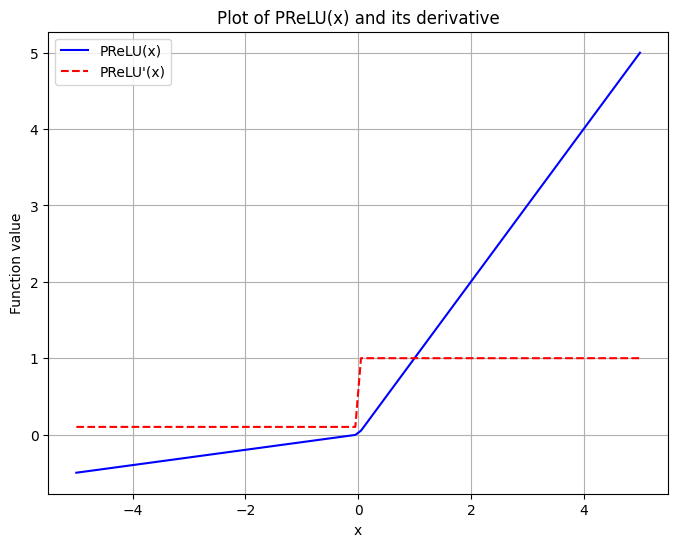

In [ ]:


# Define the PReLU function and its derivative
def prelu(x, alpha):
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha)

# Define the range of x values
x_values = np.linspace(-5, 5, 100)

# Choose a value for alpha (slope coefficient)
alpha = 0.1

# Calculate PReLU(x) and its derivative
prelu_values = prelu(x_values, alpha)
derivative_values = prelu_derivative(x_values, alpha)

# Plot both functions
plt.figure(figsize=(8, 6))
plt.plot(x_values, prelu_values, label='PReLU(x)', color='blue')
plt.plot(x_values, derivative_values, label="PReLU'(x)", color='red', linestyle='--')

# Add labels and title
plt.title("Plot of PReLU(x) and its derivative")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


<ipython-input-11-c8884e414f72>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i+2)


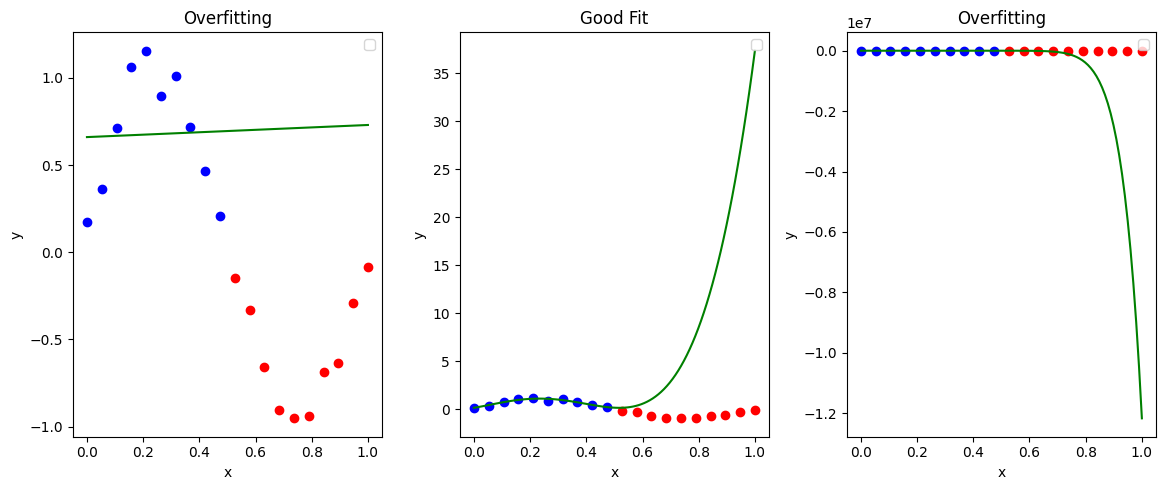

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 1, 20)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, x.shape[0])

# Split data into training and testing sets
x_train = x[:10]
y_train = y[:10]
x_test = x[10:]
y_test = y[10:]

# Define degrees for polynomial features
degrees = [1, 4, 15]

plt.figure(figsize=(15, 5))

# Plot the original data
plt.subplot(1, 3, 1)
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.title('Underfitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

for i, degree in enumerate(degrees):
    # Train polynomial regression model
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([('polynomial_features', polynomial_features),
                      ('linear_regression', linear_regression)])
    model.fit(x_train[:, np.newaxis], y_train)

    # Predictions
    x_plot = np.linspace(0, 1, 100)
    y_plot = model.predict(x_plot[:, np.newaxis])

    # Calculate training and testing error
    train_error = mean_squared_error(y_train, model.predict(x_train[:, np.newaxis]))
    test_error = mean_squared_error(y_test, model.predict(x_test[:, np.newaxis]))

    # Plot the fitted curve
    plt.subplot(1, 4, i+2)
    plt.scatter(x_train, y_train, color='blue'   )
    plt.scatter(x_test, y_test, color='red'  )
    plt.plot(x_plot, y_plot, color='green'      )
    plt.title('Good Fit' if degree == 4 else 'Overfitting')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()
